In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.decomposition import PCA

import pickle

In [288]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [289]:
df = data.copy()

In [290]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [291]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [292]:
month = pd.get_dummies(df.Month)

In [293]:
Visitor = pd.get_dummies(df.VisitorType)

In [294]:
Weekend = pd.get_dummies(df.Weekend)

In [295]:
Weekend.columns.values

array([False, True], dtype=object)

In [296]:
Weekend.columns = columns

In [297]:
columns = ['weekend_false','weekend_true']

In [298]:
Revenue = pd.get_dummies(df.Revenue)

In [299]:
Revenue.columns.values

array([False, True], dtype=object)

In [300]:
columns1 = ['Revenue_false','Revenue_true']

In [301]:
Revenue.columns = columns1

In [302]:
df = pd.concat([df,month, Visitor,Weekend,Revenue], axis=1)

In [303]:
df = df.drop(['Month', 'Revenue','VisitorType','Weekend'],axis=1)

In [304]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,weekend_false,weekend_true,Revenue_false,Revenue_true
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [337]:
df_corr = df.corr()

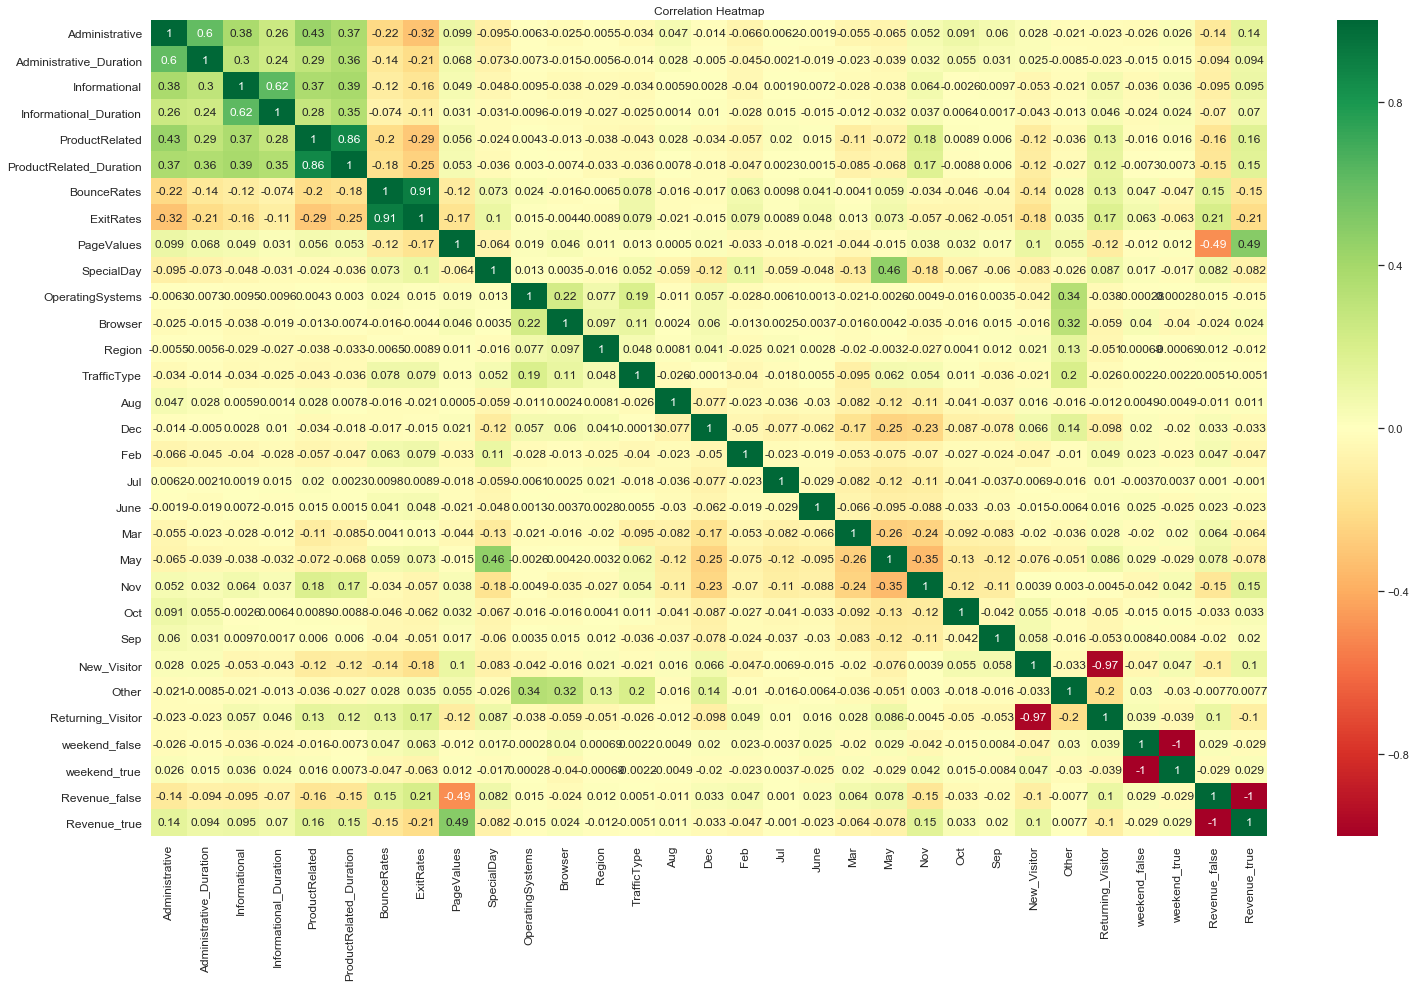

In [427]:
plt.figure(figsize = (25,15))
s = sns.heatmap(df_corr,
               annot = True,
               cmap = 'RdYlGn',
               vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

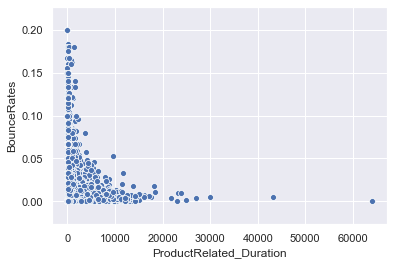

In [342]:
s = sns.scatterplot(data=df , x='ProductRelated_Duration', y='BounceRates')

In [352]:
scaler = StandardScaler()

In [353]:
df_std = scaler.fit_transform(df)

In [354]:
df_std.shape

(12330, 31)

In [367]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

In [415]:
pca = PCA(.80)

In [416]:
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [417]:
pca.n_components_

16

In [430]:
pca_explained_variance = pca.explained_variance_ratio_

In [419]:
pca = PCA(n_components = 16)

In [420]:
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [421]:
pca_components = pca.components_

In [431]:
pca_transformed = pca.transform(df_std)

In [423]:
df_pca= pd.DataFrame(data = pca_components, 
                     columns = df.columns.values,
                     index = ['Components_1', 'Components_2', 'Components 3','Components 4', 'Components 5', 'Components 6',
                                  'Components 7', 'Components 8', 'Components 9','Components 10', 'Components 11','Components 12',
                                  'Components 13', 'Components 14', 'Components 15','Components 16'])
df_pca.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,weekend_false,weekend_true,Revenue_false,Revenue_true
Components_1,0.332821,0.277807,0.286401,0.238964,0.354465,0.352173,-0.270713,-0.320235,0.180489,-0.105620,-0.014502,-0.010866,-0.015807,-0.040863,0.023480,-0.003814,-0.065128,0.004032,-0.016080,-0.051191,-0.103239,0.130369,0.043377,0.033165,0.059373,-0.018092,-0.053909,-0.059605,0.059605,-0.273161,0.273161
Components_2,0.121508,0.125346,0.219459,0.204261,0.249956,0.259153,0.134555,0.141822,-0.244304,0.124241,-0.043318,-0.079767,-0.062876,-0.032512,-0.006592,-0.087684,0.042528,0.010775,0.027513,-0.009953,0.115738,-0.018934,-0.053107,-0.045556,-0.443710,-0.119223,0.462795,0.090327,-0.090327,0.276280,-0.276280
Components 3,-0.021981,-0.016983,-0.029044,-0.022450,0.025499,0.030998,0.081897,0.079285,0.174705,0.038067,0.117352,0.159186,0.042828,0.103015,-0.004051,0.037624,0.012736,-0.012607,0.024094,-0.103549,0.050870,0.013397,-0.028364,-0.001553,-0.091679,0.163863,0.051235,0.612327,-0.612327,-0.218343,0.218343
Components 4,0.151623,0.151782,0.077322,0.072162,0.016490,0.026394,-0.198492,-0.194247,-0.263304,-0.123757,0.081040,0.083822,0.079796,-0.014792,0.036335,0.193830,-0.043421,0.010040,0.016820,0.055228,-0.126985,-0.140327,0.049070,0.072620,0.297668,0.133912,-0.323171,0.229426,-0.229426,0.421843,-0.421843
Components 5,0.020687,0.038015,0.079375,0.085222,0.067277,0.080048,0.160250,0.148083,0.011221,0.029882,0.454177,0.379435,0.185767,0.346026,-0.037122,0.158112,-0.047871,-0.009603,0.000009,-0.134992,0.011856,0.049386,-0.045796,-0.046396,-0.109283,0.495114,-0.009521,-0.232218,0.232218,0.028950,-0.028950


([<matplotlib.axis.YTick at 0x15e29dd0>,
 <a list of 3 Text yticklabel objects>)

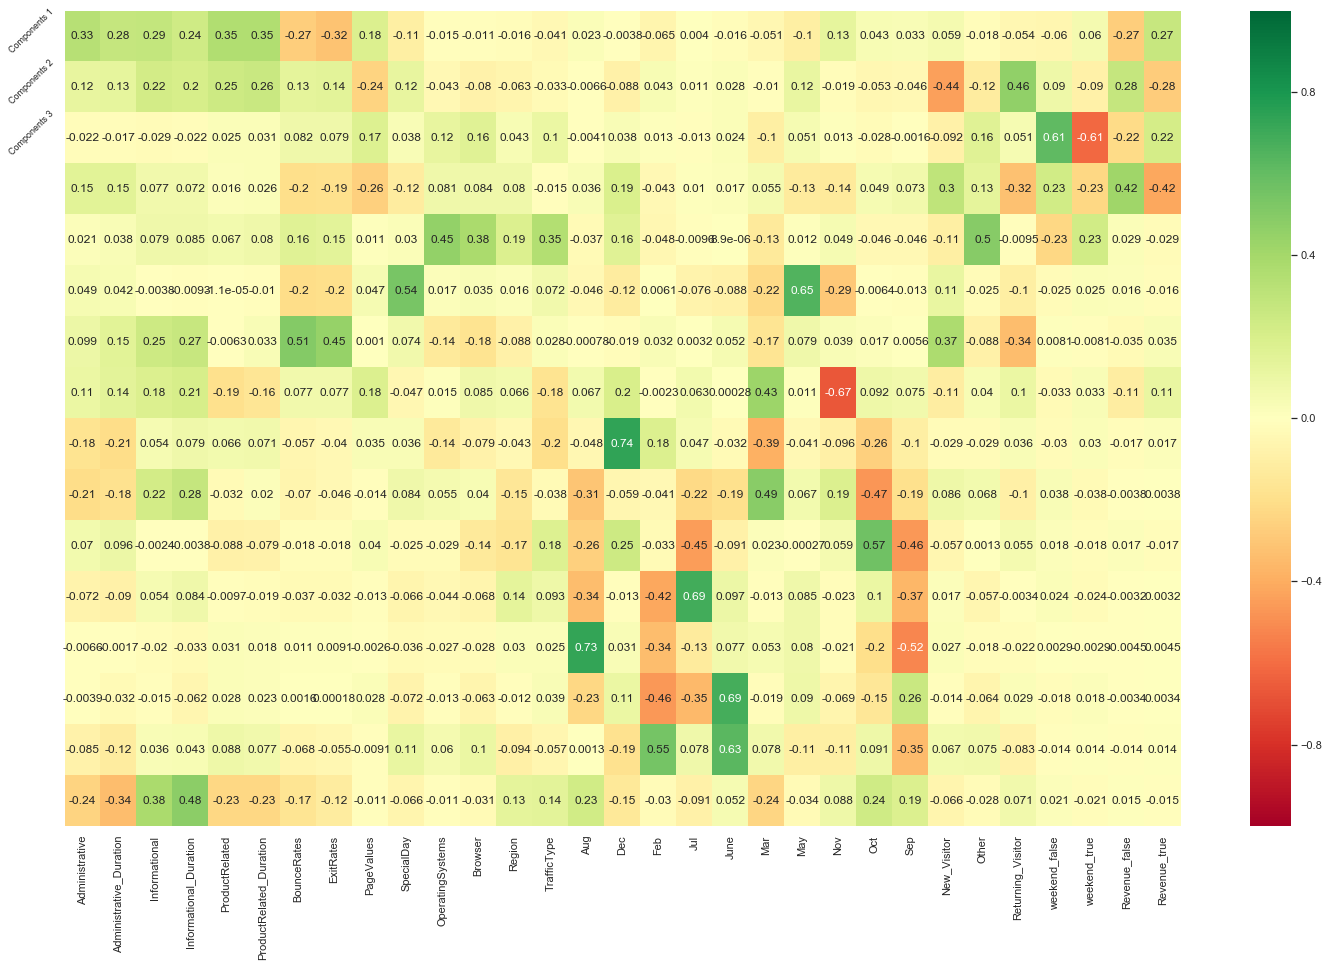

In [429]:
plt.figure(figsize=(25,15))
sns.heatmap(df_pca,
           vmin = -1,
           vmax = 1,
           cmap = 'RdYlGn',
           annot = True)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          ['Components 1', 'Components 2', 'Components 3'],
          rotation = 45,
          fontsize = 9)

In [432]:
# important featuers: Bounce rate, exit rate, special day, aug, dec, feb, jul, 
# jun,may, nov(-ve),oct,sep(-ve),other,weekend(true & false)

In [390]:
scores_pca = pca.transform(df_std)